# Task-04

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r"C:\Users\samik\OneDrive\Desktop\prodigy tasks\Task 4\twitter_training.csv", header=None)
df.columns = ["ID", "Topic", "Sentiment", "Text"]


In [3]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.tail()

,ID,Topic,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(2340)

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(71656, 4)

In [13]:
df.dropna(inplace=True)
df["Sentiment"] = df["Sentiment"].str.capitalize()
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [14]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts


Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

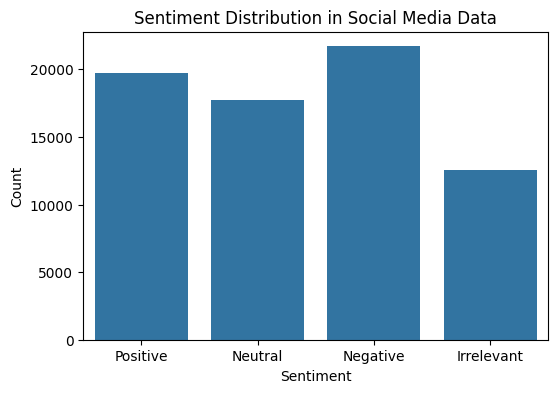

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution in Social Media Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


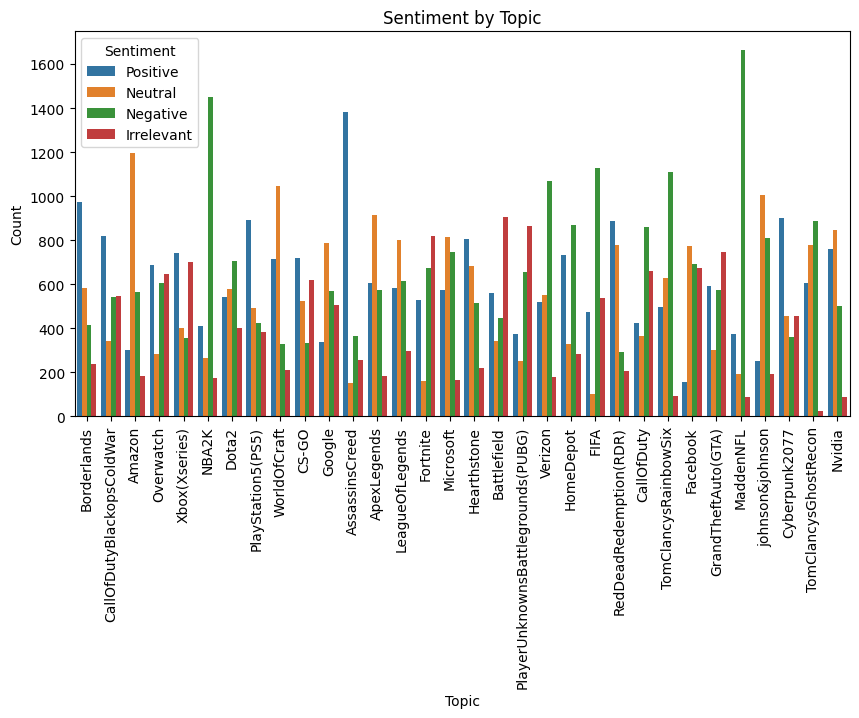

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Topic", hue="Sentiment")
plt.xticks(rotation=90)
plt.title("Sentiment by Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()


In [17]:
text_data = " ".join(df["Text"].astype(str))

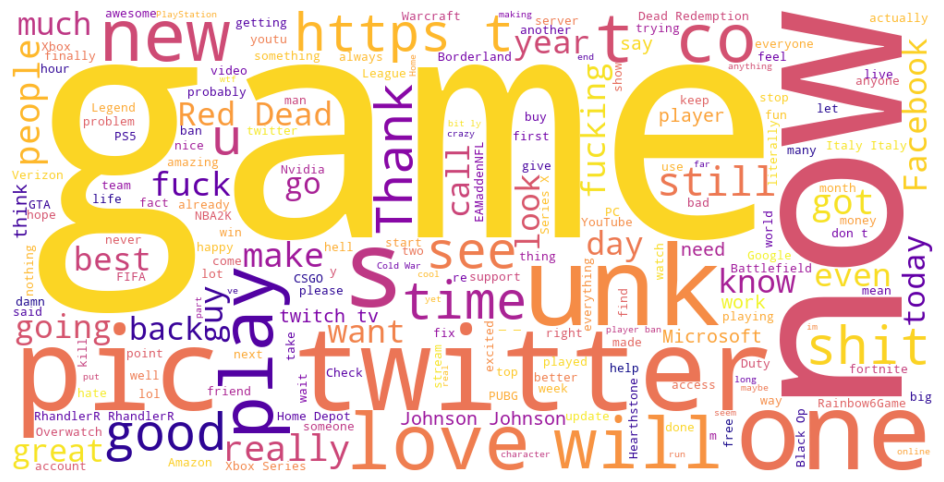

In [18]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=stopwords,
    colormap="plasma",
    max_words=200
).generate(text_data)

plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
